# Lab 8 - Are there fragile regions in the human genome?

## Combinatorial Algorithms - Chapter 6
Material and embedded lab.

Motivation and some exercises are variations on those available in Bioinformatics Algorithms: An Active-Learning Approach by Phillip Compeau & Pavel Pevzner.

In [1]:
debug = True # Set this to False before pushing to be graded
display_available = True
try:
    display('Verifying you can use display')
    from IPython.display import Image
except:
    display_available = False
try:
    import pygraphviz
    graphviz_installed = True # Set this to False if you don't have graphviz
except:
    graphviz_installed = False

'Verifying you can use display'

# Of Mice and Men
* Nearly every human gene has a mouse counterpart
* We even have genes that make tails, but those are silenced

So the question is:
> What evolutionary forces have transformed the genome of the human-mouse ancestor into the present-day human and mouse genomes?



## Genome rearrangement
* You can cut the 23 human chromosomes into 280 pieces, shuffle these DNA fragments and then glue the pieces together in a new order to form the 20 mouse chromosomes
* In this chapter and lab we will work to understand the genome rearrangements that have separated the human and mouse genomes

## Quick word about the X chromosome
* One of two sex-determining chromosomes in mammals
* It's retained nearly all its genes throughout mammalian evolution
* We can view it as a mini-genome because this chromosome's genes have not jumped onto different chromosomes

## Synteny blocks
* Genes across species often appear in procession
* This is known as a synteny block
* Constructing these blocks simplifies our problem from 150 million base pairs on the X chromosome to only eleven units

<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/mouse_and_human_synteny_blocks.png">
Color and shape indicate a block. Direction indicated by arrow head. Note that some blocks are longer than others.

## Reversal Genome Rearrangment
* Flips around an interval of a chromosome and inverts the directions of any synteny blocks within that interval
* Genome rearrangements typically cause the death or sterility of the mutated organism
* So they are pretty rare
* A tiny fraction may have a positive effect on survival and propagate

How do we go from human to mouse (and is this the only way we can do so with 7 changes)? 
<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/transforming_mouse_into_human_7_reversals.png">

## Random Breakage Model
* 1973, Susumu Ohno proposed the Random Breakage Model of chromosome evolution
* Hypothesizes that the breakage points of rearrangements are selected randomly
* Implies that rearrangement hotspots in mammalian genomes do not exist
* Yet Ohno's model lacked supporting evidence when it was introduced

*Replicating a computational experiment*

> In 1984, Joseph Nadeau and Benjamin Taylor asked what the expected lengths of synteny blocks should be after N reversals occurring at random locations in the genome. If we rule out the unlikely event that two random reversals cut the chromosome in exactly the same position, then N random reversals cut the chromosome in 2N locations and produce 2N + 1 synteny blocks. The figure below depicts the result of a computational experiment in which 320 random reversals are applied to a simulated chromosome consisting of 25,000 genes, producing 2 · 320 + 1 = 641 synteny blocks. The average synteny block size is 25,000/641 ≈ 34 genes, but this does not mean that all synteny blocks should have approximately 34 genes. If we select random locations for breakage points, then some blocks may have only a few genes, whereas other blocks may contain over a hundred.

**Exercise 1**: Simulating reversals

Using the method descried above, I want you to write a simulation that cuts the chromosome into blocks. You should end up with 2N+1 blocks (N=320 below). The autograder is going to look at the distribution of the lengths of your blocks. This is a stochastic simulation, so the autograder has run this simulation many times, and it is aware of reasonable levels of variation. 

In [34]:
import pandas as pd
ngenes = 25000
chromosome = ["g%d"%i for i in range(ngenes)]
pd.Series(chromosome)

0            g0
1            g1
2            g2
3            g3
4            g4
          ...  
24995    g24995
24996    g24996
24997    g24997
24998    g24998
24999    g24999
Length: 25000, dtype: object

array([340, 157,  61,  40,  19,  15,   4,   1,   2,   1])

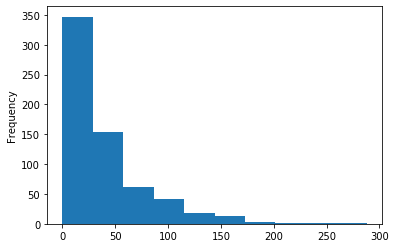

In [63]:
%matplotlib inline 
import random
import numpy as np
random.seed(0)
random_reversals = 320

bins = [0. ,  27.8,  55.6,  83.4, 111.2, 139. , 166.8, 194.6, 222.4, 250.2, 278.]
lens = [] # FILLING THIS OUT WITH THE LENGTHS OF YOUR BLOCKS IS WHAT AUTOGRADER NEEDS
# YOUR SOLUTION HERE
if display_available:
    display(pd.Series(lens).plot.hist());
counts,centers = np.histogram(lens,bins=bins)
counts

In [61]:
# Don't forget to push!